# Homework 11 - Transfer Learning (Domain Adversarial Training)

> Author: Arvin Liu (r09922071@ntu.edu.tw)

If there are any questions, please contact mlta-2022-spring@googlegroups.com

# Readme

In homework 11, you will need to implement Domain Adversarial Training in Transfer Learning. As shown in the bottom left part of the figure.

<img src="https://i.imgur.com/iMVIxCH.png" width="500px">

> 

## Scenario and Why Domain Adversarial Training
Now we have labeled source data and unlabeled target data, where source data might be relavent to the target data. We now want to train a model with source data only and test it on target data.

What problem might occur if we do so? After we have learned Anomaly Detection, we now know that if we test the model with an abnormal data that have never appeared in source data, our trained model is likely to result in poor performance since it is not familiar with the abnormal data.

For example, we have a model that contains Feature Extractor and Classifier:
<img src="https://i.imgur.com/IL0PxCY.png" width="500px">

When the model is trained with source data, the feature extractor 
will extract meaningful features since it is familiar with the distribution of it.It could be seen in the following figure that the blue dots, which is the distribution of source data, has already been clustered into different clusters. Therefore, the Classifier can predict the label based on these clusters.

However, when test on the target data, the Feature Extractor will not be able to extract meaningful features that follow the distribution of the source feature distribution, which result in the classifier learned for the source domain will not be able to apply to the target domain.


## Domain Adversarial Training of Nerural Networks (DaNN)

Based on the above problems, DaNN approaches build mappings between the source (training-time) and the target (test-time) domains, so that the classifier learned for the source domain can also be applied to the target domain, when composed with the learned mapping between domains.

<img src="https://i.imgur.com/vrOE5a6.png" width="500px">

In DaNN, the authors added a Domain Classifier, which is a deep discriminatively-trained classifeir in the training framework to distinguish the data from different domain by the features extracted by the feature extractor. As the training progresses, the approach promotes a domain classifier that discriminates between the source and the target domains and a feature extractor that can extractor features that are discriminative for the main learning task on the source domain and indiscriminate with respect to the shift between the domains. 


The feature extractor are likely to outperform the domain classifier as its input are generated by the feature extractor and that the task of domain classification and label classification are not conflict.

This method leads to the emergence of features that are domain-invariant and on the same feature distribution.

# Data Introduce

Our task contains source data: real photos, and target data: hand-drawn graffiti.

We are going to train the model with the photos and the labels, and try to predict what the labels are for hand-drawn graffiti.

The data could be downloaded [here](https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.0/real_or_drawing.zip). The code below is for data downloading and visualization.

Note that: **The source and target data are all balanced data, you can make use of this information.**

In [ ]:
# i. early stage
# cv2.Canny(np.array(x), 170, 300) epochs 2000
# ii. middle stage
# cv2.Canny(np.array(x), 170, 300) epoch 5000
# iii. final stage
# cv2.Canny(np.array(x), 220, 250)) epoch 5000

In [1]:
# # Download dataset
# !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.0/real_or_drawing.zip" -O real_or_drawing.zip

# # Download from mirrored dataset link
# # !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.1/real_or_drawing.zip" -O real_or_drawing.zip
# # !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.2/real_or_drawing.zip" -O real_or_drawing.zip

# # Unzip the files
# !unzip real_or_drawing.zip

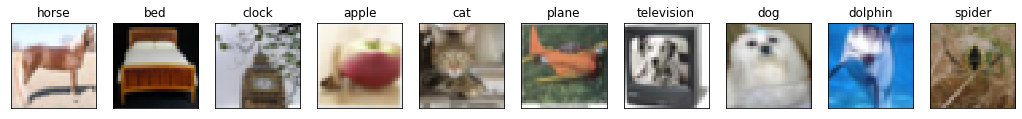

In [2]:
import matplotlib.pyplot as plt

def no_axis_show(img, title='', cmap=None):
  # imshow, and set the interpolation mode to be "nearest"。
  fig = plt.imshow(img, interpolation='nearest', cmap=cmap)
  # do not show the axes in the images.
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  plt.title(title)

titles = ['horse', 'bed', 'clock', 'apple', 'cat', 'plane', 'television', 'dog', 'dolphin', 'spider']
plt.figure(figsize=(18, 18))
for i in range(10):
  plt.subplot(1, 10, i+1)
  fig = no_axis_show(plt.imread(f'real_or_drawing/train_data/{i}/{500*i}.bmp'), title=titles[i])

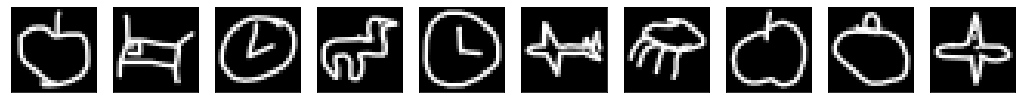

In [3]:
plt.figure(figsize=(18, 18))
for i in range(10):
  plt.subplot(1, 10, i+1)
  fig = no_axis_show(plt.imread(f'real_or_drawing/test_data/0/' + str(i).rjust(5, '0') + '.bmp'))

# Special Domain Knowledge

When we graffiti, we usually draw the outline only, therefore we can perform edge detection processing on the source data to make it more similar to the target data.


## Canny Edge Detection
The implementation of Canny Edge Detection is as follow.
The algorithm will not be describe thoroughly here.  If you are interested, please refer to the wiki or [here](https://medium.com/@pomelyu5199/canny-edge-detector-%E5%AF%A6%E4%BD%9C-opencv-f7d1a0a57d19).

We only need two parameters to implement Canny Edge Detection with CV2:  `low_threshold` and `high_threshold`.

```cv2.Canny(image, low_threshold, high_threshold)```

Simply put, when the edge value exceeds the high_threshold, we determine it as an edge. If the edge value is only above low_threshold, we will then determine whether it is an edge or not.

Let's implement it on the source data.

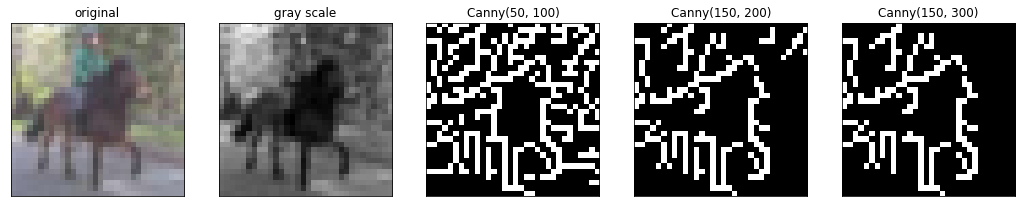

In [4]:
import cv2
import matplotlib.pyplot as plt
titles = ['horse', 'bed', 'clock', 'apple', 'cat', 'plane', 'television', 'dog', 'dolphin', 'spider']
plt.figure(figsize=(18, 18))

original_img = plt.imread(f'real_or_drawing/train_data/0/2.bmp')
plt.subplot(1, 5, 1)
no_axis_show(original_img, title='original')

gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 5, 2)
no_axis_show(gray_img, title='gray scale', cmap='gray')

gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 5, 2)
no_axis_show(gray_img, title='gray scale', cmap='gray')

canny_50100 = cv2.Canny(gray_img, 50, 100)
plt.subplot(1, 5, 3)
no_axis_show(canny_50100, title='Canny(50, 100)', cmap='gray')

canny_150200 = cv2.Canny(gray_img, 150, 200)
plt.subplot(1, 5, 4)
no_axis_show(canny_150200, title='Canny(150, 200)', cmap='gray')

canny_250300 = cv2.Canny(gray_img, 150, 300)
plt.subplot(1, 5, 5)
no_axis_show(canny_250300, title='Canny(150, 300)', cmap='gray')
  

# Data Process
 
 
The data is suitible for `torchvision.ImageFolder`. You can create a dataset with `torchvision.ImageFolder`. Details for image augmentation please refer to the comments in the following codes.

In [49]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
 
source_transform = transforms.Compose([
    # Turn RGB to grayscale. (Bacause Canny do not support RGB images.)
    transforms.Grayscale(),
    # cv2 do not support skimage.Image, so we transform it to np.array, 
    # and then adopt cv2.Canny algorithm.
    transforms.Lambda(lambda x: cv2.Canny(np.array(x), 220, 250)),
    # Transform np.array back to the skimage.Image.
    transforms.ToPILImage(),
    # 50% Horizontal Flip. (For Augmentation)
    transforms.RandomHorizontalFlip(),
    # Rotate +- 15 degrees. (For Augmentation), and filled with zero 
    # if there's empty pixel after rotation.
    transforms.RandomRotation(15, fill=(0,)),
    # Transform to tensor for model inputs.
    transforms.ToTensor(),
])
target_transform = transforms.Compose([
    # Turn RGB to grayscale.
    transforms.Grayscale(),
    # Resize: size of source data is 32x32, thus we need to 
    #  enlarge the size of target data from 28x28 to 32x32。
    transforms.Resize((32, 32)),
    # 50% Horizontal Flip. (For Augmentation)
    transforms.RandomHorizontalFlip(),
    # Rotate +- 15 degrees. (For Augmentation), and filled with zero 
    # if there's empty pixel after rotation.
    transforms.RandomRotation(15, fill=(0,)),
    # Transform to tensor for model inputs.
    transforms.ToTensor(),
])
 
source_dataset = ImageFolder('real_or_drawing/train_data', transform=source_transform)
target_dataset = ImageFolder('real_or_drawing/test_data', transform=target_transform)
 
source_dataloader = DataLoader(source_dataset, batch_size=32, shuffle=True)
target_dataloader = DataLoader(target_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(target_dataset, batch_size=128, shuffle=False)

# Model

Feature Extractor: Classic VGG-like architecture

Label Predictor / Domain Classifier: Linear models.

In [7]:
class FeatureExtractor(nn.Module):

    def __init__(self):
        super(FeatureExtractor, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
    def forward(self, x):
        x = self.conv(x).squeeze()
        return x

class LabelPredictor(nn.Module):

    def __init__(self):
        super(LabelPredictor, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.ReLU(),

            nn.Linear(512, 10),
        )

    def forward(self, h):
        c = self.layer(h)
        return c

class DomainClassifier(nn.Module):

    def __init__(self):
        super(DomainClassifier, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 1),
        )

    def forward(self, h):
        y = self.layer(h)
        return y

# Pre-processing

Here we use Adam as our optimizor.

In [8]:
feature_extractor = FeatureExtractor().cuda()
label_predictor = LabelPredictor().cuda()
domain_classifier = DomainClassifier().cuda()

class_criterion = nn.CrossEntropyLoss()
domain_criterion = nn.BCEWithLogitsLoss()

learning_rate = 1e-3
optimizer_F = optim.Adam(feature_extractor.parameters(),  lr = learning_rate)
optimizer_C = optim.Adam(label_predictor.parameters(), lr = learning_rate)
optimizer_D = optim.Adam(domain_classifier.parameters(), lr = learning_rate)

# Start Training


## DaNN Implementation

In the original paper, Gradient Reversal Layer is used.
Feature Extractor, Label Predictor, and Domain Classifier are all trained at the same time. In this code, we train Domain Classifier first, and then train our Feature Extractor (same concept as Generator and Discriminator training process in GAN).

## Reminder
* Lambda, which controls the domain adversarial loss, is adaptive in the original paper. You can refer to [the original work](https://arxiv.org/pdf/1505.07818.pdf) . Here lambda is set to 0.1.
* We do not have the label to target data, you can only evaluate your model by uploading your result to kaggle.:)

In [50]:
def train_epoch(source_dataloader, target_dataloader, lamb):
    '''
      Args:
        source_dataloader: source data的dataloader
        target_dataloader: target data的dataloader
        lamb: control the balance of domain adaptatoin and classification.
    '''

    # D loss: Domain Classifier的loss
    # F loss: Feature Extrator & Label Predictor的loss
    running_D_loss, running_F_loss = 0.0, 0.0
    total_hit, total_num = 0.0, 0.0

    for i, ((source_data, source_label), (target_data, _)) in enumerate(zip(source_dataloader, target_dataloader)):

        source_data = source_data.cuda()
        source_label = source_label.cuda()
        target_data = target_data.cuda()
        
        # Mixed the source data and target data, or it'll mislead the running params
        #   of batch_norm. (runnning mean/var of soucre and target data are different.)
        mixed_data = torch.cat([source_data, target_data], dim=0)
        domain_label = torch.zeros([source_data.shape[0] + target_data.shape[0], 1]).cuda()
        # set domain label of source data to be 1.
        domain_label[:source_data.shape[0]] = 1

        # Step 1 : train domain classifier
        feature = feature_extractor(mixed_data)
        # We don't need to train feature extractor in step 1.
        # Thus we detach the feature neuron to avoid backpropgation.
        domain_logits = domain_classifier(feature.detach())
        loss = domain_criterion(domain_logits, domain_label)
        running_D_loss+= loss.item()
        loss.backward()
        optimizer_D.step()

        # Step 2 : train feature extractor and label classifier
        class_logits = label_predictor(feature[:source_data.shape[0]])
        domain_logits = domain_classifier(feature)
        # loss = cross entropy of classification - lamb * domain binary cross entropy.
        #  The reason why using subtraction is similar to generator loss in disciminator of GAN
        loss = class_criterion(class_logits, source_label) - lamb * domain_criterion(domain_logits, domain_label)
        running_F_loss+= loss.item()
        loss.backward()
        optimizer_F.step()
        optimizer_C.step()

        optimizer_D.zero_grad()
        optimizer_F.zero_grad()
        optimizer_C.zero_grad()

        total_hit += torch.sum(torch.argmax(class_logits, dim=1) == source_label).item()
        total_num += source_data.shape[0]
        print(i, end='\r')

    return running_D_loss / (i+1), running_F_loss / (i+1), total_hit / total_num

# train 200 epochs
for epoch in range(5000):
    train_D_loss, train_F_loss, train_acc = train_epoch(source_dataloader, target_dataloader, lamb=0.1)

    torch.save(feature_extractor.state_dict(), f'extractor_model.bin')
    torch.save(label_predictor.state_dict(), f'predictor_model.bin')

    print('epoch {:>3d}: train D loss: {:6.4f}, train F loss: {:6.4f}, acc {:6.4f}'.format(epoch, train_D_loss, train_F_loss, train_acc))


epoch   0: train D loss: 0.6742, train F loss: 0.2570, acc 0.9250
epoch   1: train D loss: 0.6689, train F loss: 0.2122, acc 0.9306
epoch   2: train D loss: 0.6629, train F loss: 0.1606, acc 0.9372
epoch   3: train D loss: 0.6551, train F loss: 0.1418, acc 0.9476
epoch   4: train D loss: 0.6625, train F loss: 0.1292, acc 0.9490
epoch   5: train D loss: 0.6561, train F loss: 0.1210, acc 0.9504
epoch   6: train D loss: 0.6554, train F loss: 0.0897, acc 0.9600
epoch   7: train D loss: 0.6560, train F loss: 0.0809, acc 0.9604
epoch   8: train D loss: 0.6521, train F loss: 0.0682, acc 0.9658
epoch   9: train D loss: 0.6558, train F loss: 0.0557, acc 0.9658
epoch  10: train D loss: 0.6488, train F loss: 0.0436, acc 0.9694
epoch  11: train D loss: 0.6499, train F loss: 0.0498, acc 0.9674
epoch  12: train D loss: 0.6482, train F loss: 0.0590, acc 0.9660
epoch  13: train D loss: 0.6452, train F loss: 0.0453, acc 0.9742
epoch  14: train D loss: 0.6510, train F loss: 0.0228, acc 0.9782
epoch  15:

epoch 123: train D loss: 0.6243, train F loss: -0.0448, acc 0.9952
epoch 124: train D loss: 0.6280, train F loss: -0.0483, acc 0.9960
epoch 125: train D loss: 0.6297, train F loss: -0.0460, acc 0.9954
epoch 126: train D loss: 0.6330, train F loss: -0.0514, acc 0.9964
epoch 127: train D loss: 0.6336, train F loss: -0.0493, acc 0.9956
epoch 128: train D loss: 0.6289, train F loss: -0.0465, acc 0.9956
epoch 129: train D loss: 0.6327, train F loss: -0.0318, acc 0.9914
epoch 130: train D loss: 0.6296, train F loss: -0.0408, acc 0.9940
epoch 131: train D loss: 0.6297, train F loss: -0.0383, acc 0.9932
epoch 132: train D loss: 0.6315, train F loss: -0.0431, acc 0.9934
epoch 133: train D loss: 0.6396, train F loss: -0.0363, acc 0.9926
epoch 134: train D loss: 0.6327, train F loss: -0.0425, acc 0.9956
epoch 135: train D loss: 0.6325, train F loss: -0.0495, acc 0.9968
epoch 136: train D loss: 0.6296, train F loss: -0.0496, acc 0.9958
epoch 137: train D loss: 0.6334, train F loss: -0.0479, acc 0.

epoch 246: train D loss: 0.6285, train F loss: -0.0539, acc 0.9974
epoch 247: train D loss: 0.6327, train F loss: -0.0548, acc 0.9970
epoch 248: train D loss: 0.6312, train F loss: -0.0546, acc 0.9974
epoch 249: train D loss: 0.6288, train F loss: -0.0516, acc 0.9962
epoch 250: train D loss: 0.6269, train F loss: -0.0518, acc 0.9976
epoch 251: train D loss: 0.6252, train F loss: -0.0517, acc 0.9972
epoch 252: train D loss: 0.6288, train F loss: -0.0451, acc 0.9954
epoch 253: train D loss: 0.6315, train F loss: -0.0494, acc 0.9960
epoch 254: train D loss: 0.6245, train F loss: -0.0527, acc 0.9972
epoch 255: train D loss: 0.6318, train F loss: -0.0475, acc 0.9954
epoch 256: train D loss: 0.6374, train F loss: -0.0428, acc 0.9942
epoch 257: train D loss: 0.6288, train F loss: -0.0393, acc 0.9936
epoch 258: train D loss: 0.6380, train F loss: -0.0485, acc 0.9960
epoch 259: train D loss: 0.6382, train F loss: -0.0251, acc 0.9932
epoch 260: train D loss: 0.6403, train F loss: 0.1231, acc 0.9

epoch 369: train D loss: 0.6330, train F loss: -0.0465, acc 0.9946
epoch 370: train D loss: 0.6312, train F loss: -0.0511, acc 0.9968
epoch 371: train D loss: 0.6304, train F loss: -0.0330, acc 0.9930
epoch 372: train D loss: 0.6318, train F loss: -0.0494, acc 0.9964
epoch 373: train D loss: 0.6390, train F loss: -0.0432, acc 0.9942
epoch 374: train D loss: 0.6324, train F loss: -0.0522, acc 0.9966
epoch 375: train D loss: 0.6320, train F loss: -0.0525, acc 0.9964
epoch 376: train D loss: 0.6346, train F loss: -0.0490, acc 0.9964
epoch 377: train D loss: 0.6334, train F loss: -0.0449, acc 0.9950
epoch 378: train D loss: 0.6369, train F loss: -0.0497, acc 0.9948
epoch 379: train D loss: 0.6317, train F loss: -0.0496, acc 0.9962
epoch 380: train D loss: 0.6315, train F loss: -0.0517, acc 0.9966
epoch 381: train D loss: 0.6293, train F loss: -0.0534, acc 0.9974
epoch 382: train D loss: 0.6373, train F loss: -0.0295, acc 0.9926
epoch 383: train D loss: 0.6294, train F loss: -0.0439, acc 0.

epoch 492: train D loss: 0.6306, train F loss: -0.0503, acc 0.9960
epoch 493: train D loss: 0.6350, train F loss: -0.0529, acc 0.9966
epoch 494: train D loss: 0.6368, train F loss: -0.0490, acc 0.9964
epoch 495: train D loss: 0.6387, train F loss: -0.0405, acc 0.9930
epoch 496: train D loss: 0.6380, train F loss: -0.0512, acc 0.9962
epoch 497: train D loss: 0.6291, train F loss: -0.0486, acc 0.9958
epoch 498: train D loss: 0.6335, train F loss: -0.0490, acc 0.9960
epoch 499: train D loss: 0.6343, train F loss: -0.0538, acc 0.9974
epoch 500: train D loss: 0.6496, train F loss: -0.0190, acc 0.9884
epoch 501: train D loss: 0.6374, train F loss: -0.0480, acc 0.9964
epoch 502: train D loss: 0.6397, train F loss: -0.0478, acc 0.9954
epoch 503: train D loss: 0.6266, train F loss: -0.0540, acc 0.9978
epoch 504: train D loss: 0.6297, train F loss: -0.0329, acc 0.9922
epoch 505: train D loss: 0.6342, train F loss: -0.0434, acc 0.9938
epoch 506: train D loss: 0.6394, train F loss: -0.0364, acc 0.

epoch 615: train D loss: 0.6237, train F loss: -0.0549, acc 0.9976
epoch 616: train D loss: 0.6336, train F loss: -0.0461, acc 0.9964
epoch 617: train D loss: 0.6278, train F loss: -0.0544, acc 0.9976
epoch 618: train D loss: 0.6375, train F loss: -0.0542, acc 0.9968
epoch 619: train D loss: 0.6327, train F loss: -0.0521, acc 0.9978
epoch 620: train D loss: 0.6381, train F loss: -0.0553, acc 0.9970
epoch 621: train D loss: 0.6298, train F loss: -0.0549, acc 0.9982
epoch 622: train D loss: 0.6347, train F loss: -0.0545, acc 0.9976
epoch 623: train D loss: 0.6280, train F loss: -0.0512, acc 0.9966
epoch 624: train D loss: 0.6322, train F loss: -0.0530, acc 0.9966
epoch 625: train D loss: 0.6318, train F loss: -0.0555, acc 0.9974
epoch 626: train D loss: 0.6287, train F loss: -0.0414, acc 0.9954
epoch 627: train D loss: 0.6348, train F loss: -0.0507, acc 0.9966
epoch 628: train D loss: 0.6398, train F loss: -0.0446, acc 0.9946
epoch 629: train D loss: 0.6324, train F loss: -0.0459, acc 0.

epoch 738: train D loss: 0.6373, train F loss: -0.0464, acc 0.9946
epoch 739: train D loss: 0.6355, train F loss: -0.0554, acc 0.9978
epoch 740: train D loss: 0.6340, train F loss: -0.0542, acc 0.9972
epoch 741: train D loss: 0.6392, train F loss: -0.0498, acc 0.9958
epoch 742: train D loss: 0.6372, train F loss: -0.0477, acc 0.9956
epoch 743: train D loss: 0.6340, train F loss: -0.0554, acc 0.9966
epoch 744: train D loss: 0.6367, train F loss: -0.0521, acc 0.9960
epoch 745: train D loss: 0.6406, train F loss: -0.0574, acc 0.9976
epoch 746: train D loss: 0.6386, train F loss: -0.0558, acc 0.9968
epoch 747: train D loss: 0.6301, train F loss: -0.0401, acc 0.9958
epoch 748: train D loss: 0.6332, train F loss: -0.0470, acc 0.9958
epoch 749: train D loss: 0.6335, train F loss: -0.0516, acc 0.9966
epoch 750: train D loss: 0.6398, train F loss: -0.0553, acc 0.9970
epoch 751: train D loss: 0.6340, train F loss: -0.0559, acc 0.9974
epoch 752: train D loss: 0.6349, train F loss: -0.0511, acc 0.

epoch 861: train D loss: 0.6366, train F loss: -0.0535, acc 0.9968
epoch 862: train D loss: 0.6376, train F loss: -0.0533, acc 0.9958
epoch 863: train D loss: 0.6378, train F loss: -0.0514, acc 0.9970
epoch 864: train D loss: 0.6331, train F loss: -0.0531, acc 0.9974
epoch 865: train D loss: 0.6396, train F loss: -0.0549, acc 0.9966
epoch 866: train D loss: 0.6360, train F loss: -0.0579, acc 0.9984
epoch 867: train D loss: 0.6400, train F loss: -0.0484, acc 0.9956
epoch 868: train D loss: 0.6401, train F loss: -0.0540, acc 0.9970
epoch 869: train D loss: 0.6353, train F loss: -0.0481, acc 0.9954
epoch 870: train D loss: 0.6392, train F loss: -0.0535, acc 0.9970
epoch 871: train D loss: 0.6364, train F loss: -0.0504, acc 0.9964
epoch 872: train D loss: 0.6342, train F loss: -0.0540, acc 0.9970
epoch 873: train D loss: 0.6330, train F loss: -0.0569, acc 0.9980
epoch 874: train D loss: 0.6337, train F loss: -0.0538, acc 0.9970
epoch 875: train D loss: 0.6285, train F loss: -0.0542, acc 0.

epoch 984: train D loss: 0.6385, train F loss: -0.0554, acc 0.9972
epoch 985: train D loss: 0.6359, train F loss: -0.0525, acc 0.9972
epoch 986: train D loss: 0.6335, train F loss: -0.0491, acc 0.9964
epoch 987: train D loss: 0.6325, train F loss: -0.0535, acc 0.9978
epoch 988: train D loss: 0.6428, train F loss: -0.0532, acc 0.9974
epoch 989: train D loss: 0.6319, train F loss: -0.0587, acc 0.9986
epoch 990: train D loss: 0.6338, train F loss: -0.0529, acc 0.9972
epoch 991: train D loss: 0.6341, train F loss: -0.0575, acc 0.9974
epoch 992: train D loss: 0.6464, train F loss: -0.0526, acc 0.9972
epoch 993: train D loss: 0.6392, train F loss: -0.0525, acc 0.9962
epoch 994: train D loss: 0.6443, train F loss: -0.0531, acc 0.9966
epoch 995: train D loss: 0.6489, train F loss: -0.0530, acc 0.9960
epoch 996: train D loss: 0.6361, train F loss: -0.0548, acc 0.9972
epoch 997: train D loss: 0.6382, train F loss: -0.0541, acc 0.9970
epoch 998: train D loss: 0.6378, train F loss: -0.0523, acc 0.

epoch 1105: train D loss: 0.6401, train F loss: -0.0518, acc 0.9962
epoch 1106: train D loss: 0.6363, train F loss: -0.0522, acc 0.9968
epoch 1107: train D loss: 0.6366, train F loss: -0.0548, acc 0.9974
epoch 1108: train D loss: 0.6398, train F loss: -0.0563, acc 0.9972
epoch 1109: train D loss: 0.6357, train F loss: -0.0545, acc 0.9970
epoch 1110: train D loss: 0.6445, train F loss: -0.0532, acc 0.9970
epoch 1111: train D loss: 0.6414, train F loss: -0.0522, acc 0.9964
epoch 1112: train D loss: 0.6351, train F loss: -0.0523, acc 0.9956
epoch 1113: train D loss: 0.6387, train F loss: -0.0503, acc 0.9964
epoch 1114: train D loss: 0.6367, train F loss: -0.0521, acc 0.9964
epoch 1115: train D loss: 0.6380, train F loss: -0.0484, acc 0.9964
epoch 1116: train D loss: 0.6358, train F loss: -0.0576, acc 0.9980
epoch 1117: train D loss: 0.6386, train F loss: -0.0574, acc 0.9976
epoch 1118: train D loss: 0.6368, train F loss: -0.0516, acc 0.9960
epoch 1119: train D loss: 0.6378, train F loss: 

epoch 1226: train D loss: 0.6435, train F loss: -0.0465, acc 0.9952
epoch 1227: train D loss: 0.6434, train F loss: -0.0573, acc 0.9978
epoch 1228: train D loss: 0.6473, train F loss: -0.0558, acc 0.9966
epoch 1229: train D loss: 0.6414, train F loss: -0.0556, acc 0.9974
epoch 1230: train D loss: 0.6403, train F loss: -0.0574, acc 0.9976
epoch 1231: train D loss: 0.6431, train F loss: -0.0493, acc 0.9952
epoch 1232: train D loss: 0.6426, train F loss: -0.0544, acc 0.9968
epoch 1233: train D loss: 0.6352, train F loss: -0.0524, acc 0.9964
epoch 1234: train D loss: 0.6424, train F loss: -0.0505, acc 0.9968
epoch 1235: train D loss: 0.6407, train F loss: -0.0532, acc 0.9976
epoch 1236: train D loss: 0.6375, train F loss: -0.0587, acc 0.9982
epoch 1237: train D loss: 0.6388, train F loss: -0.0565, acc 0.9986
epoch 1238: train D loss: 0.6429, train F loss: -0.0531, acc 0.9970
epoch 1239: train D loss: 0.6343, train F loss: -0.0527, acc 0.9972
epoch 1240: train D loss: 0.6376, train F loss: 

epoch 1347: train D loss: 0.6379, train F loss: -0.0572, acc 0.9978
epoch 1348: train D loss: 0.6414, train F loss: -0.0566, acc 0.9974
epoch 1349: train D loss: 0.6364, train F loss: -0.0540, acc 0.9984
epoch 1350: train D loss: 0.6351, train F loss: -0.0529, acc 0.9968
epoch 1351: train D loss: 0.6407, train F loss: -0.0576, acc 0.9976
epoch 1352: train D loss: 0.6402, train F loss: -0.0573, acc 0.9980
epoch 1353: train D loss: 0.6407, train F loss: -0.0582, acc 0.9982
epoch 1354: train D loss: 0.6452, train F loss: -0.0523, acc 0.9962
epoch 1355: train D loss: 0.6436, train F loss: -0.0517, acc 0.9964
epoch 1356: train D loss: 0.6366, train F loss: -0.0454, acc 0.9964
epoch 1357: train D loss: 0.6448, train F loss: -0.0489, acc 0.9954
epoch 1358: train D loss: 0.6421, train F loss: -0.0583, acc 0.9980
epoch 1359: train D loss: 0.6402, train F loss: -0.0565, acc 0.9972
epoch 1360: train D loss: 0.6346, train F loss: -0.0562, acc 0.9982
epoch 1361: train D loss: 0.6380, train F loss: 

epoch 1468: train D loss: 0.6401, train F loss: -0.0581, acc 0.9982
epoch 1469: train D loss: 0.6415, train F loss: -0.0570, acc 0.9976
epoch 1470: train D loss: 0.6403, train F loss: -0.0550, acc 0.9978
epoch 1471: train D loss: 0.6517, train F loss: 0.0004, acc 0.9918
epoch 1472: train D loss: 0.6478, train F loss: -0.0450, acc 0.9938
epoch 1473: train D loss: 0.6423, train F loss: -0.0501, acc 0.9952
epoch 1474: train D loss: 0.6436, train F loss: -0.0532, acc 0.9958
epoch 1475: train D loss: 0.6474, train F loss: -0.0548, acc 0.9974
epoch 1476: train D loss: 0.6459, train F loss: -0.0557, acc 0.9980
epoch 1477: train D loss: 0.6424, train F loss: -0.0554, acc 0.9970
epoch 1478: train D loss: 0.6388, train F loss: -0.0560, acc 0.9980
epoch 1479: train D loss: 0.6451, train F loss: -0.0583, acc 0.9980
epoch 1480: train D loss: 0.6444, train F loss: -0.0555, acc 0.9976
epoch 1481: train D loss: 0.6308, train F loss: -0.0569, acc 0.9972
epoch 1482: train D loss: 0.6421, train F loss: -

epoch 1589: train D loss: 0.6471, train F loss: -0.0318, acc 0.9928
epoch 1590: train D loss: 0.6512, train F loss: -0.0322, acc 0.9914
epoch 1591: train D loss: 0.6433, train F loss: -0.0541, acc 0.9976
epoch 1592: train D loss: 0.6426, train F loss: -0.0516, acc 0.9964
epoch 1593: train D loss: 0.6435, train F loss: -0.0524, acc 0.9962
epoch 1594: train D loss: 0.6398, train F loss: -0.0583, acc 0.9984
epoch 1595: train D loss: 0.6430, train F loss: -0.0572, acc 0.9978
epoch 1596: train D loss: 0.6437, train F loss: -0.0424, acc 0.9950
epoch 1597: train D loss: 0.6420, train F loss: -0.0557, acc 0.9978
epoch 1598: train D loss: 0.6391, train F loss: -0.0551, acc 0.9974
epoch 1599: train D loss: 0.6396, train F loss: -0.0573, acc 0.9972
epoch 1600: train D loss: 0.6389, train F loss: -0.0562, acc 0.9978
epoch 1601: train D loss: 0.6404, train F loss: -0.0584, acc 0.9982
epoch 1602: train D loss: 0.6367, train F loss: -0.0552, acc 0.9974
epoch 1603: train D loss: 0.6356, train F loss: 

epoch 1710: train D loss: 0.6469, train F loss: -0.0366, acc 0.9970
epoch 1711: train D loss: 0.6431, train F loss: -0.0407, acc 0.9936
epoch 1712: train D loss: 0.6419, train F loss: -0.0556, acc 0.9982
epoch 1713: train D loss: 0.6434, train F loss: -0.0512, acc 0.9968
epoch 1714: train D loss: 0.6395, train F loss: -0.0591, acc 0.9986
epoch 1715: train D loss: 0.6416, train F loss: -0.0550, acc 0.9976
epoch 1716: train D loss: 0.6424, train F loss: -0.0503, acc 0.9960
epoch 1717: train D loss: 0.6356, train F loss: -0.0565, acc 0.9978
epoch 1718: train D loss: 0.6372, train F loss: -0.0559, acc 0.9978
epoch 1719: train D loss: 0.6386, train F loss: -0.0585, acc 0.9980
epoch 1720: train D loss: 0.6429, train F loss: -0.0582, acc 0.9978
epoch 1721: train D loss: 0.6433, train F loss: -0.0511, acc 0.9964
epoch 1722: train D loss: 0.6417, train F loss: -0.0592, acc 0.9984
epoch 1723: train D loss: 0.6374, train F loss: -0.0549, acc 0.9976
epoch 1724: train D loss: 0.6526, train F loss: 

epoch 1831: train D loss: 0.6458, train F loss: -0.0517, acc 0.9960
epoch 1832: train D loss: 0.6423, train F loss: -0.0565, acc 0.9974
epoch 1833: train D loss: 0.6412, train F loss: -0.0547, acc 0.9968
epoch 1834: train D loss: 0.6500, train F loss: -0.0443, acc 0.9954
epoch 1835: train D loss: 0.6453, train F loss: -0.0563, acc 0.9976
epoch 1836: train D loss: 0.6428, train F loss: -0.0538, acc 0.9968
epoch 1837: train D loss: 0.6407, train F loss: -0.0524, acc 0.9974
epoch 1838: train D loss: 0.6410, train F loss: -0.0562, acc 0.9972
epoch 1839: train D loss: 0.6439, train F loss: -0.0587, acc 0.9972
epoch 1840: train D loss: 0.6403, train F loss: -0.0581, acc 0.9980
epoch 1841: train D loss: 0.6404, train F loss: -0.0580, acc 0.9984
epoch 1842: train D loss: 0.6378, train F loss: -0.0578, acc 0.9980
epoch 1843: train D loss: 0.6433, train F loss: -0.0575, acc 0.9980
epoch 1844: train D loss: 0.6374, train F loss: -0.0598, acc 0.9990
epoch 1845: train D loss: 0.6444, train F loss: 

epoch 1952: train D loss: 0.6423, train F loss: -0.0459, acc 0.9962
epoch 1953: train D loss: 0.6456, train F loss: -0.0592, acc 0.9980
epoch 1954: train D loss: 0.6445, train F loss: -0.0539, acc 0.9974
epoch 1955: train D loss: 0.6460, train F loss: -0.0593, acc 0.9980
epoch 1956: train D loss: 0.6439, train F loss: -0.0537, acc 0.9970
epoch 1957: train D loss: 0.6389, train F loss: -0.0544, acc 0.9974
epoch 1958: train D loss: 0.6386, train F loss: -0.0549, acc 0.9978
epoch 1959: train D loss: 0.6424, train F loss: -0.0594, acc 0.9986
epoch 1960: train D loss: 0.6414, train F loss: -0.0454, acc 0.9950
epoch 1961: train D loss: 0.6389, train F loss: -0.0598, acc 0.9988
epoch 1962: train D loss: 0.6425, train F loss: -0.0584, acc 0.9980
epoch 1963: train D loss: 0.6535, train F loss: -0.0238, acc 0.9926
epoch 1964: train D loss: 0.6428, train F loss: -0.0467, acc 0.9944
epoch 1965: train D loss: 0.6487, train F loss: -0.0536, acc 0.9968
epoch 1966: train D loss: 0.6401, train F loss: 

epoch 2073: train D loss: 0.6433, train F loss: -0.0543, acc 0.9974
epoch 2074: train D loss: 0.6422, train F loss: -0.0576, acc 0.9978
epoch 2075: train D loss: 0.6478, train F loss: -0.0557, acc 0.9974
epoch 2076: train D loss: 0.6400, train F loss: -0.0537, acc 0.9962
epoch 2077: train D loss: 0.6401, train F loss: -0.0579, acc 0.9982
epoch 2078: train D loss: 0.6435, train F loss: -0.0583, acc 0.9980
epoch 2079: train D loss: 0.6522, train F loss: 0.0054, acc 0.9912
epoch 2080: train D loss: 0.6450, train F loss: -0.0472, acc 0.9958
epoch 2081: train D loss: 0.6462, train F loss: -0.0465, acc 0.9954
epoch 2082: train D loss: 0.6457, train F loss: -0.0520, acc 0.9962
epoch 2083: train D loss: 0.6397, train F loss: -0.0562, acc 0.9976
epoch 2084: train D loss: 0.6339, train F loss: -0.0571, acc 0.9980
epoch 2085: train D loss: 0.6404, train F loss: -0.0576, acc 0.9982
epoch 2086: train D loss: 0.6410, train F loss: -0.0536, acc 0.9976
epoch 2087: train D loss: 0.6409, train F loss: -

epoch 2194: train D loss: 0.6496, train F loss: -0.0501, acc 0.9964
epoch 2195: train D loss: 0.6586, train F loss: -0.0286, acc 0.9914
epoch 2196: train D loss: 0.6448, train F loss: -0.0545, acc 0.9970
epoch 2197: train D loss: 0.6432, train F loss: -0.0540, acc 0.9972
epoch 2198: train D loss: 0.6467, train F loss: -0.0567, acc 0.9974
epoch 2199: train D loss: 0.6530, train F loss: -0.0534, acc 0.9970
epoch 2200: train D loss: 0.6473, train F loss: -0.0508, acc 0.9972
epoch 2201: train D loss: 0.6506, train F loss: -0.0436, acc 0.9940
epoch 2202: train D loss: 0.6535, train F loss: -0.0563, acc 0.9968
epoch 2203: train D loss: 0.6426, train F loss: -0.0591, acc 0.9982
epoch 2204: train D loss: 0.6425, train F loss: -0.0581, acc 0.9982
epoch 2205: train D loss: 0.6399, train F loss: -0.0563, acc 0.9970
epoch 2206: train D loss: 0.6409, train F loss: -0.0580, acc 0.9982
epoch 2207: train D loss: 0.6425, train F loss: -0.0595, acc 0.9984
epoch 2208: train D loss: 0.6437, train F loss: 

epoch 2315: train D loss: 0.6425, train F loss: -0.0577, acc 0.9976
epoch 2316: train D loss: 0.6399, train F loss: -0.0520, acc 0.9962
epoch 2317: train D loss: 0.6444, train F loss: -0.0404, acc 0.9966
epoch 2318: train D loss: 0.6398, train F loss: -0.0530, acc 0.9972
epoch 2319: train D loss: 0.6415, train F loss: -0.0548, acc 0.9974
epoch 2320: train D loss: 0.6474, train F loss: -0.0574, acc 0.9972
epoch 2321: train D loss: 0.6531, train F loss: -0.0484, acc 0.9958
epoch 2322: train D loss: 0.6536, train F loss: -0.0283, acc 0.9922
epoch 2323: train D loss: 0.6454, train F loss: -0.0377, acc 0.9918
epoch 2324: train D loss: 0.6403, train F loss: -0.0460, acc 0.9950
epoch 2325: train D loss: 0.6396, train F loss: -0.0500, acc 0.9966
epoch 2326: train D loss: 0.6428, train F loss: -0.0543, acc 0.9970
epoch 2327: train D loss: 0.6432, train F loss: -0.0556, acc 0.9970
epoch 2328: train D loss: 0.6429, train F loss: -0.0554, acc 0.9970
epoch 2329: train D loss: 0.6445, train F loss: 

epoch 2436: train D loss: 0.6448, train F loss: -0.0575, acc 0.9982
epoch 2437: train D loss: 0.6493, train F loss: -0.0513, acc 0.9960
epoch 2438: train D loss: 0.6484, train F loss: -0.0539, acc 0.9970
epoch 2439: train D loss: 0.6452, train F loss: -0.0593, acc 0.9982
epoch 2440: train D loss: 0.6463, train F loss: -0.0598, acc 0.9984
epoch 2441: train D loss: 0.6460, train F loss: -0.0591, acc 0.9982
epoch 2442: train D loss: 0.6458, train F loss: 0.0569, acc 0.9942
epoch 2443: train D loss: 0.6419, train F loss: -0.0245, acc 0.9908
epoch 2444: train D loss: 0.6401, train F loss: -0.0505, acc 0.9954
epoch 2445: train D loss: 0.6374, train F loss: -0.0505, acc 0.9960
epoch 2446: train D loss: 0.6455, train F loss: -0.0468, acc 0.9958
epoch 2447: train D loss: 0.6407, train F loss: -0.0536, acc 0.9964
epoch 2448: train D loss: 0.6463, train F loss: -0.0554, acc 0.9966
epoch 2449: train D loss: 0.6460, train F loss: -0.0578, acc 0.9980
epoch 2450: train D loss: 0.6444, train F loss: -

epoch 2557: train D loss: 0.6440, train F loss: -0.0585, acc 0.9978
epoch 2558: train D loss: 0.6432, train F loss: -0.0577, acc 0.9984
epoch 2559: train D loss: 0.6459, train F loss: -0.0545, acc 0.9972
epoch 2560: train D loss: 0.6479, train F loss: -0.0563, acc 0.9974
epoch 2561: train D loss: 0.6397, train F loss: -0.0566, acc 0.9976
epoch 2562: train D loss: 0.6449, train F loss: -0.0545, acc 0.9976
epoch 2563: train D loss: 0.6472, train F loss: -0.0585, acc 0.9980
epoch 2564: train D loss: 0.6451, train F loss: -0.0571, acc 0.9974
epoch 2565: train D loss: 0.6469, train F loss: -0.0564, acc 0.9982
epoch 2566: train D loss: 0.6476, train F loss: -0.0480, acc 0.9952
epoch 2567: train D loss: 0.6575, train F loss: -0.0583, acc 0.9978
epoch 2568: train D loss: 0.6469, train F loss: -0.0514, acc 0.9968
epoch 2569: train D loss: 0.6435, train F loss: -0.0594, acc 0.9982
epoch 2570: train D loss: 0.6504, train F loss: -0.0569, acc 0.9976
epoch 2571: train D loss: 0.6472, train F loss: 

epoch 2678: train D loss: 0.6567, train F loss: -0.0454, acc 0.9944
epoch 2679: train D loss: 0.6573, train F loss: -0.0514, acc 0.9958
epoch 2680: train D loss: 0.6471, train F loss: -0.0500, acc 0.9974
epoch 2681: train D loss: 0.6501, train F loss: -0.0541, acc 0.9978
epoch 2682: train D loss: 0.6469, train F loss: -0.0513, acc 0.9970
epoch 2683: train D loss: 0.6464, train F loss: -0.0549, acc 0.9976
epoch 2684: train D loss: 0.6495, train F loss: -0.0545, acc 0.9974
epoch 2685: train D loss: 0.6484, train F loss: -0.0497, acc 0.9958
epoch 2686: train D loss: 0.6519, train F loss: -0.0597, acc 0.9986
epoch 2687: train D loss: 0.6516, train F loss: -0.0590, acc 0.9980
epoch 2688: train D loss: 0.6490, train F loss: -0.0545, acc 0.9968
epoch 2689: train D loss: 0.6482, train F loss: -0.0553, acc 0.9978
epoch 2690: train D loss: 0.6453, train F loss: -0.0588, acc 0.9982
epoch 2691: train D loss: 0.6434, train F loss: -0.0594, acc 0.9986
epoch 2692: train D loss: 0.6494, train F loss: 

epoch 2799: train D loss: 0.6534, train F loss: -0.0526, acc 0.9962
epoch 2800: train D loss: 0.6512, train F loss: -0.0543, acc 0.9964
epoch 2801: train D loss: 0.6455, train F loss: -0.0553, acc 0.9970
epoch 2802: train D loss: 0.6454, train F loss: -0.0559, acc 0.9976
epoch 2803: train D loss: 0.6492, train F loss: -0.0583, acc 0.9974
epoch 2804: train D loss: 0.6445, train F loss: -0.0600, acc 0.9986
epoch 2805: train D loss: 0.6504, train F loss: -0.0588, acc 0.9978
epoch 2806: train D loss: 0.6424, train F loss: -0.0574, acc 0.9980
epoch 2807: train D loss: 0.6435, train F loss: -0.0573, acc 0.9976
epoch 2808: train D loss: 0.6507, train F loss: -0.0568, acc 0.9974
epoch 2809: train D loss: 0.6552, train F loss: -0.0527, acc 0.9966
epoch 2810: train D loss: 0.6486, train F loss: -0.0582, acc 0.9978
epoch 2811: train D loss: 0.6471, train F loss: -0.0504, acc 0.9968
epoch 2812: train D loss: 0.6469, train F loss: -0.0568, acc 0.9974
epoch 2813: train D loss: 0.6469, train F loss: 

epoch 2920: train D loss: 0.6460, train F loss: -0.0566, acc 0.9976
epoch 2921: train D loss: 0.6553, train F loss: -0.0366, acc 0.9954
epoch 2922: train D loss: 0.6476, train F loss: -0.0509, acc 0.9960
epoch 2923: train D loss: 0.6512, train F loss: -0.0594, acc 0.9976
epoch 2924: train D loss: 0.6471, train F loss: -0.0572, acc 0.9976
epoch 2925: train D loss: 0.6474, train F loss: -0.0589, acc 0.9984
epoch 2926: train D loss: 0.6443, train F loss: -0.0593, acc 0.9986
epoch 2927: train D loss: 0.6484, train F loss: -0.0568, acc 0.9974
epoch 2928: train D loss: 0.6448, train F loss: -0.0611, acc 0.9984
epoch 2929: train D loss: 0.6474, train F loss: -0.0607, acc 0.9982
epoch 2930: train D loss: 0.6445, train F loss: -0.0589, acc 0.9976
epoch 2931: train D loss: 0.6478, train F loss: -0.0604, acc 0.9982
epoch 2932: train D loss: 0.6432, train F loss: -0.0574, acc 0.9974
epoch 2933: train D loss: 0.6467, train F loss: -0.0605, acc 0.9986
epoch 2934: train D loss: 0.6485, train F loss: 

epoch 3041: train D loss: 0.6495, train F loss: -0.0540, acc 0.9972
epoch 3042: train D loss: 0.6555, train F loss: -0.0502, acc 0.9962
epoch 3043: train D loss: 0.6532, train F loss: -0.0455, acc 0.9946
epoch 3044: train D loss: 0.6515, train F loss: -0.0557, acc 0.9964
epoch 3045: train D loss: 0.6512, train F loss: -0.0606, acc 0.9982
epoch 3046: train D loss: 0.6502, train F loss: -0.0558, acc 0.9976
epoch 3047: train D loss: 0.6460, train F loss: -0.0509, acc 0.9970
epoch 3048: train D loss: 0.6571, train F loss: -0.0503, acc 0.9964
epoch 3049: train D loss: 0.6576, train F loss: -0.0541, acc 0.9972
epoch 3050: train D loss: 0.6502, train F loss: -0.0547, acc 0.9976
epoch 3051: train D loss: 0.6496, train F loss: -0.0588, acc 0.9978
epoch 3052: train D loss: 0.6487, train F loss: -0.0562, acc 0.9972
epoch 3053: train D loss: 0.6498, train F loss: -0.0546, acc 0.9972
epoch 3054: train D loss: 0.6442, train F loss: -0.0602, acc 0.9986
epoch 3055: train D loss: 0.6471, train F loss: 

epoch 3162: train D loss: 0.6524, train F loss: -0.0441, acc 0.9962
epoch 3163: train D loss: 0.6553, train F loss: -0.0544, acc 0.9962
epoch 3164: train D loss: 0.6491, train F loss: -0.0553, acc 0.9970
epoch 3165: train D loss: 0.6517, train F loss: -0.0551, acc 0.9964
epoch 3166: train D loss: 0.6443, train F loss: -0.0584, acc 0.9982
epoch 3167: train D loss: 0.6518, train F loss: -0.0580, acc 0.9978
epoch 3168: train D loss: 0.6451, train F loss: -0.0606, acc 0.9986
epoch 3169: train D loss: 0.6470, train F loss: -0.0597, acc 0.9984
epoch 3170: train D loss: 0.6490, train F loss: -0.0588, acc 0.9982
epoch 3171: train D loss: 0.6565, train F loss: -0.0573, acc 0.9968
epoch 3172: train D loss: 0.6602, train F loss: -0.0013, acc 0.9876
epoch 3173: train D loss: 0.6468, train F loss: -0.0345, acc 0.9918
epoch 3174: train D loss: 0.6487, train F loss: -0.0488, acc 0.9948
epoch 3175: train D loss: 0.6503, train F loss: -0.0501, acc 0.9964
epoch 3176: train D loss: 0.6511, train F loss: 

epoch 3283: train D loss: 0.6514, train F loss: -0.0531, acc 0.9974
epoch 3284: train D loss: 0.6463, train F loss: -0.0599, acc 0.9984
epoch 3285: train D loss: 0.6458, train F loss: -0.0588, acc 0.9982
epoch 3286: train D loss: 0.6520, train F loss: -0.0586, acc 0.9978
epoch 3287: train D loss: 0.6656, train F loss: -0.0590, acc 0.9980
epoch 3288: train D loss: 0.6534, train F loss: -0.0572, acc 0.9978
epoch 3289: train D loss: 0.6555, train F loss: -0.0523, acc 0.9966
epoch 3290: train D loss: 0.6519, train F loss: -0.0596, acc 0.9982
epoch 3291: train D loss: 0.6492, train F loss: -0.0563, acc 0.9968
epoch 3292: train D loss: 0.6495, train F loss: -0.0568, acc 0.9978
epoch 3293: train D loss: 0.6500, train F loss: -0.0536, acc 0.9978
epoch 3294: train D loss: 0.6530, train F loss: -0.0553, acc 0.9978
epoch 3295: train D loss: 0.6584, train F loss: -0.0546, acc 0.9970
epoch 3296: train D loss: 0.6505, train F loss: -0.0534, acc 0.9970
epoch 3297: train D loss: 0.6518, train F loss: 

epoch 3404: train D loss: 0.6489, train F loss: -0.0513, acc 0.9952
epoch 3405: train D loss: 0.6488, train F loss: -0.0538, acc 0.9976
epoch 3406: train D loss: 0.6563, train F loss: -0.0538, acc 0.9966
epoch 3407: train D loss: 0.6505, train F loss: -0.0594, acc 0.9984
epoch 3408: train D loss: 0.6508, train F loss: -0.0595, acc 0.9980
epoch 3409: train D loss: 0.6527, train F loss: -0.0544, acc 0.9974
epoch 3410: train D loss: 0.6492, train F loss: -0.0553, acc 0.9970
epoch 3411: train D loss: 0.6428, train F loss: -0.0563, acc 0.9978
epoch 3412: train D loss: 0.6482, train F loss: -0.0587, acc 0.9980
epoch 3413: train D loss: 0.6529, train F loss: -0.0596, acc 0.9982
epoch 3414: train D loss: 0.6472, train F loss: -0.0576, acc 0.9980
epoch 3415: train D loss: 0.6498, train F loss: -0.0543, acc 0.9972
epoch 3416: train D loss: 0.6483, train F loss: -0.0561, acc 0.9980
epoch 3417: train D loss: 0.6487, train F loss: -0.0613, acc 0.9988
epoch 3418: train D loss: 0.6444, train F loss: 

epoch 3525: train D loss: 0.6453, train F loss: -0.0597, acc 0.9986
epoch 3526: train D loss: 0.6472, train F loss: -0.0591, acc 0.9984
epoch 3527: train D loss: 0.6521, train F loss: -0.0616, acc 0.9988
epoch 3528: train D loss: 0.6525, train F loss: -0.0509, acc 0.9966
epoch 3529: train D loss: 0.6574, train F loss: -0.0420, acc 0.9952
epoch 3530: train D loss: 0.6490, train F loss: -0.0546, acc 0.9974
epoch 3531: train D loss: 0.6558, train F loss: -0.0473, acc 0.9956
epoch 3532: train D loss: 0.6554, train F loss: -0.0540, acc 0.9966
epoch 3533: train D loss: 0.6519, train F loss: -0.0596, acc 0.9982
epoch 3534: train D loss: 0.6521, train F loss: -0.0560, acc 0.9974
epoch 3535: train D loss: 0.6508, train F loss: -0.0574, acc 0.9976
epoch 3536: train D loss: 0.6526, train F loss: -0.0576, acc 0.9980
epoch 3537: train D loss: 0.6561, train F loss: -0.0571, acc 0.9970
epoch 3538: train D loss: 0.6481, train F loss: -0.0576, acc 0.9974
epoch 3539: train D loss: 0.6543, train F loss: 

epoch 3646: train D loss: 0.6550, train F loss: -0.0584, acc 0.9976
epoch 3647: train D loss: 0.6558, train F loss: -0.0525, acc 0.9972
epoch 3648: train D loss: 0.6534, train F loss: -0.0530, acc 0.9968
epoch 3649: train D loss: 0.6506, train F loss: -0.0593, acc 0.9982
epoch 3650: train D loss: 0.6497, train F loss: -0.0596, acc 0.9988
epoch 3651: train D loss: 0.6535, train F loss: -0.0611, acc 0.9988
epoch 3652: train D loss: 0.6491, train F loss: -0.0612, acc 0.9988
epoch 3653: train D loss: 0.6487, train F loss: -0.0594, acc 0.9978
epoch 3654: train D loss: 0.6528, train F loss: -0.0590, acc 0.9982
epoch 3655: train D loss: 0.6546, train F loss: -0.0569, acc 0.9982
epoch 3656: train D loss: 0.6490, train F loss: -0.0530, acc 0.9962
epoch 3657: train D loss: 0.6499, train F loss: -0.0613, acc 0.9988
epoch 3658: train D loss: 0.6532, train F loss: -0.0590, acc 0.9980
epoch 3659: train D loss: 0.6530, train F loss: -0.0612, acc 0.9984
epoch 3660: train D loss: 0.6507, train F loss: 

epoch 3767: train D loss: 0.6580, train F loss: -0.0609, acc 0.9984
epoch 3768: train D loss: 0.6575, train F loss: -0.0552, acc 0.9966
epoch 3769: train D loss: 0.6521, train F loss: -0.0542, acc 0.9972
epoch 3770: train D loss: 0.6581, train F loss: 0.1234, acc 0.9790
epoch 3771: train D loss: 0.6493, train F loss: -0.0334, acc 0.9900
epoch 3772: train D loss: 0.6546, train F loss: -0.0097, acc 0.9920
epoch 3773: train D loss: 0.6538, train F loss: -0.0515, acc 0.9954
epoch 3774: train D loss: 0.6493, train F loss: -0.0563, acc 0.9972
epoch 3775: train D loss: 0.6455, train F loss: -0.0463, acc 0.9966
epoch 3776: train D loss: 0.6506, train F loss: -0.0515, acc 0.9950
epoch 3777: train D loss: 0.6523, train F loss: -0.0551, acc 0.9968
epoch 3778: train D loss: 0.6510, train F loss: -0.0561, acc 0.9972
epoch 3779: train D loss: 0.6540, train F loss: -0.0582, acc 0.9976
epoch 3780: train D loss: 0.6472, train F loss: -0.0569, acc 0.9972
epoch 3781: train D loss: 0.6491, train F loss: -

epoch 3888: train D loss: 0.6613, train F loss: -0.0167, acc 0.9952
epoch 3889: train D loss: 0.6586, train F loss: -0.0525, acc 0.9952
epoch 3890: train D loss: 0.6504, train F loss: -0.0579, acc 0.9972
epoch 3891: train D loss: 0.6575, train F loss: -0.0525, acc 0.9962
epoch 3892: train D loss: 0.6556, train F loss: -0.0536, acc 0.9964
epoch 3893: train D loss: 0.6523, train F loss: -0.0612, acc 0.9986
epoch 3894: train D loss: 0.6528, train F loss: -0.0584, acc 0.9978
epoch 3895: train D loss: 0.6480, train F loss: -0.0605, acc 0.9986
epoch 3896: train D loss: 0.6480, train F loss: -0.0613, acc 0.9990
epoch 3897: train D loss: 0.6501, train F loss: -0.0588, acc 0.9982
epoch 3898: train D loss: 0.6495, train F loss: -0.0604, acc 0.9984
epoch 3899: train D loss: 0.6519, train F loss: -0.0557, acc 0.9980
epoch 3900: train D loss: 0.6570, train F loss: -0.0605, acc 0.9980
epoch 3901: train D loss: 0.6560, train F loss: -0.0577, acc 0.9976
epoch 3902: train D loss: 0.6501, train F loss: 

epoch 4009: train D loss: 0.6511, train F loss: -0.0573, acc 0.9974
epoch 4010: train D loss: 0.6520, train F loss: -0.0574, acc 0.9976
epoch 4011: train D loss: 0.6500, train F loss: -0.0596, acc 0.9980
epoch 4012: train D loss: 0.6533, train F loss: -0.0614, acc 0.9988
epoch 4013: train D loss: 0.6466, train F loss: -0.0604, acc 0.9984
epoch 4014: train D loss: 0.6539, train F loss: -0.0564, acc 0.9976
epoch 4015: train D loss: 0.6484, train F loss: -0.0590, acc 0.9978
epoch 4016: train D loss: 0.6534, train F loss: -0.0590, acc 0.9978
epoch 4017: train D loss: 0.6494, train F loss: -0.0566, acc 0.9976
epoch 4018: train D loss: 0.6534, train F loss: -0.0585, acc 0.9980
epoch 4019: train D loss: 0.6479, train F loss: -0.0617, acc 0.9990
epoch 4020: train D loss: 0.6523, train F loss: -0.0602, acc 0.9984
epoch 4021: train D loss: 0.6480, train F loss: -0.0564, acc 0.9978
epoch 4022: train D loss: 0.6495, train F loss: -0.0577, acc 0.9984
epoch 4023: train D loss: 0.6462, train F loss: 

epoch 4130: train D loss: 0.6549, train F loss: -0.0564, acc 0.9978
epoch 4131: train D loss: 0.6519, train F loss: -0.0605, acc 0.9984
epoch 4132: train D loss: 0.6478, train F loss: -0.0568, acc 0.9974
epoch 4133: train D loss: 0.6507, train F loss: -0.0560, acc 0.9978
epoch 4134: train D loss: 0.6502, train F loss: -0.0587, acc 0.9986
epoch 4135: train D loss: 0.6500, train F loss: -0.0615, acc 0.9988
epoch 4136: train D loss: 0.6567, train F loss: -0.0558, acc 0.9974
epoch 4137: train D loss: 0.6615, train F loss: -0.0477, acc 0.9962
epoch 4138: train D loss: 0.6546, train F loss: -0.0559, acc 0.9978
epoch 4139: train D loss: 0.6546, train F loss: -0.0588, acc 0.9978
epoch 4140: train D loss: 0.6695, train F loss: -0.0619, acc 0.9990
epoch 4141: train D loss: 0.6542, train F loss: -0.0593, acc 0.9984
epoch 4142: train D loss: 0.6524, train F loss: -0.0598, acc 0.9978
epoch 4143: train D loss: 0.6528, train F loss: -0.0616, acc 0.9988
epoch 4144: train D loss: 0.6489, train F loss: 

epoch 4251: train D loss: 0.6532, train F loss: -0.0611, acc 0.9982
epoch 4252: train D loss: 0.6520, train F loss: -0.0573, acc 0.9976
epoch 4253: train D loss: 0.6569, train F loss: -0.0515, acc 0.9964
epoch 4254: train D loss: 0.6546, train F loss: -0.0551, acc 0.9972
epoch 4255: train D loss: 0.6494, train F loss: -0.0557, acc 0.9972
epoch 4256: train D loss: 0.6544, train F loss: -0.0603, acc 0.9982
epoch 4257: train D loss: 0.6522, train F loss: -0.0576, acc 0.9980
epoch 4258: train D loss: 0.6613, train F loss: -0.0622, acc 0.9986
epoch 4259: train D loss: 0.6546, train F loss: -0.0610, acc 0.9986
epoch 4260: train D loss: 0.6531, train F loss: -0.0598, acc 0.9984
epoch 4261: train D loss: 0.6581, train F loss: -0.0589, acc 0.9984
epoch 4262: train D loss: 0.6530, train F loss: -0.0606, acc 0.9984
epoch 4263: train D loss: 0.6555, train F loss: -0.0579, acc 0.9982
epoch 4264: train D loss: 0.6587, train F loss: -0.0567, acc 0.9970
epoch 4265: train D loss: 0.6586, train F loss: 

epoch 4372: train D loss: 0.6544, train F loss: -0.0578, acc 0.9978
epoch 4373: train D loss: 0.6494, train F loss: -0.0545, acc 0.9970
epoch 4374: train D loss: 0.6566, train F loss: -0.0484, acc 0.9958
epoch 4375: train D loss: 0.6522, train F loss: -0.0607, acc 0.9982
epoch 4376: train D loss: 0.6502, train F loss: -0.0577, acc 0.9980
epoch 4377: train D loss: 0.6499, train F loss: -0.0597, acc 0.9986
epoch 4378: train D loss: 0.6532, train F loss: -0.0597, acc 0.9986
epoch 4379: train D loss: 0.6552, train F loss: -0.0590, acc 0.9976
epoch 4380: train D loss: 0.6516, train F loss: -0.0584, acc 0.9984
epoch 4381: train D loss: 0.6547, train F loss: -0.0593, acc 0.9984
epoch 4382: train D loss: 0.6495, train F loss: -0.0599, acc 0.9984
epoch 4383: train D loss: 0.6504, train F loss: -0.0585, acc 0.9980
epoch 4384: train D loss: 0.6487, train F loss: -0.0574, acc 0.9972
epoch 4385: train D loss: 0.6579, train F loss: -0.0531, acc 0.9966
epoch 4386: train D loss: 0.6525, train F loss: 

epoch 4493: train D loss: 0.6584, train F loss: -0.0567, acc 0.9972
epoch 4494: train D loss: 0.6577, train F loss: -0.0611, acc 0.9984
epoch 4495: train D loss: 0.6540, train F loss: -0.0588, acc 0.9978
epoch 4496: train D loss: 0.6581, train F loss: -0.0440, acc 0.9954
epoch 4497: train D loss: 0.6603, train F loss: -0.0480, acc 0.9954
epoch 4498: train D loss: 0.6560, train F loss: -0.0593, acc 0.9980
epoch 4499: train D loss: 0.6531, train F loss: -0.0426, acc 0.9948
epoch 4500: train D loss: 0.6599, train F loss: -0.0523, acc 0.9968
epoch 4501: train D loss: 0.6532, train F loss: -0.0546, acc 0.9970
epoch 4502: train D loss: 0.6536, train F loss: -0.0535, acc 0.9964
epoch 4503: train D loss: 0.6499, train F loss: -0.0554, acc 0.9976
epoch 4504: train D loss: 0.6487, train F loss: -0.0585, acc 0.9984
epoch 4505: train D loss: 0.6564, train F loss: -0.0605, acc 0.9986
epoch 4506: train D loss: 0.6515, train F loss: -0.0612, acc 0.9986
epoch 4507: train D loss: 0.6550, train F loss: 

epoch 4614: train D loss: 0.6447, train F loss: -0.0378, acc 0.9924
epoch 4615: train D loss: 0.6405, train F loss: -0.0405, acc 0.9950
epoch 4616: train D loss: 0.6401, train F loss: -0.0459, acc 0.9954
epoch 4617: train D loss: 0.6440, train F loss: -0.0527, acc 0.9962
epoch 4618: train D loss: 0.6459, train F loss: -0.0519, acc 0.9964
epoch 4619: train D loss: 0.6508, train F loss: -0.0513, acc 0.9960
epoch 4620: train D loss: 0.6458, train F loss: -0.0583, acc 0.9980
epoch 4621: train D loss: 0.6538, train F loss: -0.0566, acc 0.9974
epoch 4622: train D loss: 0.6513, train F loss: -0.0567, acc 0.9972
epoch 4623: train D loss: 0.6515, train F loss: -0.0580, acc 0.9982
epoch 4624: train D loss: 0.6478, train F loss: -0.0588, acc 0.9976
epoch 4625: train D loss: 0.6511, train F loss: -0.0546, acc 0.9980
epoch 4626: train D loss: 0.6479, train F loss: -0.0497, acc 0.9972
epoch 4627: train D loss: 0.6515, train F loss: -0.0585, acc 0.9978
epoch 4628: train D loss: 0.6497, train F loss: 

epoch 4735: train D loss: 0.6529, train F loss: -0.0526, acc 0.9966
epoch 4736: train D loss: 0.6550, train F loss: -0.0498, acc 0.9952
epoch 4737: train D loss: 0.6549, train F loss: -0.0571, acc 0.9980
epoch 4738: train D loss: 0.6524, train F loss: -0.0597, acc 0.9978
epoch 4739: train D loss: 0.6457, train F loss: -0.0541, acc 0.9974
epoch 4740: train D loss: 0.6469, train F loss: -0.0593, acc 0.9982
epoch 4741: train D loss: 0.6433, train F loss: -0.0597, acc 0.9984
epoch 4742: train D loss: 0.6513, train F loss: -0.0589, acc 0.9984
epoch 4743: train D loss: 0.6500, train F loss: -0.0575, acc 0.9976
epoch 4744: train D loss: 0.6509, train F loss: -0.0602, acc 0.9986
epoch 4745: train D loss: 0.6502, train F loss: -0.0607, acc 0.9984
epoch 4746: train D loss: 0.6480, train F loss: -0.0602, acc 0.9986
epoch 4747: train D loss: 0.6504, train F loss: -0.0611, acc 0.9986
epoch 4748: train D loss: 0.6487, train F loss: -0.0620, acc 0.9990
epoch 4749: train D loss: 0.6510, train F loss: 

epoch 4856: train D loss: 0.6562, train F loss: -0.0599, acc 0.9984
epoch 4857: train D loss: 0.6501, train F loss: -0.0572, acc 0.9978
epoch 4858: train D loss: 0.6496, train F loss: -0.0592, acc 0.9980
epoch 4859: train D loss: 0.6506, train F loss: -0.0571, acc 0.9976
epoch 4860: train D loss: 0.6579, train F loss: -0.0482, acc 0.9970
epoch 4861: train D loss: 0.6541, train F loss: -0.0597, acc 0.9980
epoch 4862: train D loss: 0.6481, train F loss: -0.0597, acc 0.9978
epoch 4863: train D loss: 0.6565, train F loss: -0.0585, acc 0.9978
epoch 4864: train D loss: 0.6540, train F loss: -0.0610, acc 0.9982
epoch 4865: train D loss: 0.6528, train F loss: -0.0595, acc 0.9980
epoch 4866: train D loss: 0.6546, train F loss: -0.0596, acc 0.9980
epoch 4867: train D loss: 0.6552, train F loss: -0.0581, acc 0.9978
epoch 4868: train D loss: 0.6552, train F loss: -0.0529, acc 0.9974
epoch 4869: train D loss: 0.6543, train F loss: -0.0509, acc 0.9976
epoch 4870: train D loss: 0.6529, train F loss: 

epoch 4977: train D loss: 0.6585, train F loss: -0.0551, acc 0.9966
epoch 4978: train D loss: 0.6536, train F loss: -0.0615, acc 0.9988
epoch 4979: train D loss: 0.6631, train F loss: -0.0442, acc 0.9954
epoch 4980: train D loss: 0.6535, train F loss: -0.0573, acc 0.9972
epoch 4981: train D loss: 0.6577, train F loss: -0.0546, acc 0.9972
epoch 4982: train D loss: 0.6532, train F loss: -0.0568, acc 0.9972
epoch 4983: train D loss: 0.6565, train F loss: -0.0495, acc 0.9966
epoch 4984: train D loss: 0.6567, train F loss: -0.0599, acc 0.9982
epoch 4985: train D loss: 0.6566, train F loss: -0.0553, acc 0.9970
epoch 4986: train D loss: 0.6533, train F loss: -0.0611, acc 0.9986
epoch 4987: train D loss: 0.6546, train F loss: -0.0608, acc 0.9984
epoch 4988: train D loss: 0.6620, train F loss: -0.0590, acc 0.9976
epoch 4989: train D loss: 0.6546, train F loss: -0.0537, acc 0.9972
epoch 4990: train D loss: 0.6538, train F loss: -0.0611, acc 0.9988
epoch 4991: train D loss: 0.6534, train F loss: 

In [51]:
torch.save(feature_extractor.state_dict(), f'extractor_model_final.bin')
torch.save(label_predictor.state_dict(), f'predictor_model_final.bin')
torch.save(domain_classifier.state_dict(), f'domain_classifier_final.bin')

# Inference

We use pandas to generate our csv file.

BTW, the performance of the model trained for 200 epoches might be unstable. You can train for more epoches for a more stable performance.

In [52]:
result = []
label_predictor.eval()
feature_extractor.eval()
for i, (test_data, _) in enumerate(test_dataloader):
    test_data = test_data.cuda()

    class_logits = label_predictor(feature_extractor(test_data))

    x = torch.argmax(class_logits, dim=1).cpu().detach().numpy()
    result.append(x)

import pandas as pd
result = np.concatenate(result)

# Generate your submission
df = pd.DataFrame({'id': np.arange(0,len(result)), 'label': result})
df.to_csv('DaNN_submission.csv',index=False)

# Visualization
We use t-SNE plot to observe the distribution of extracted features.   
ref: https://learnopencv.com/t-sne-for-feature-visualization/

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

## Step1: Load checkpoint and evaluate to get extracted features

In [76]:
# Hints:
# Set features_extractor to eval mode
# Start evaluation and collect features and labels
label_predictor.eval()
feature_extractor.eval()
for i, (test_data, _) in enumerate(test_dataloader):
    test_data = test_data.cuda()
    feature = feature_extractor(test_data)
    class_logits = label_predictor(feature)
    
    feature = feature.detach().cpu().numpy()
    label = torch.argmax(class_logits, dim=1).cpu().detach().numpy()
    
    
    if i==0: 
        features = feature
        labels = label
    else: 
        features = np.concatenate((features, feature))
        labels = np.concatenate((labels, label))

## Step2: Apply t-SNE and normalize
https://learnopencv.com/t-sne-for-feature-visualization/

In [77]:
# process extracted features with t-SNE 
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(features)

# Normalization the processed features 
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.026s...
[t-SNE] Computed neighbors for 100000 samples in 233.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

## Step3: Visualization with matplotlib

In [78]:
X_norm.shape

(100000, 2)

In [79]:
tx = X_norm[:,0]
ty = X_norm[:,1]

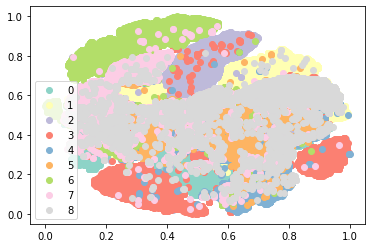

In [80]:
# Data Visualization
# Use matplotlib to plot the distribution
# The shape of X_norm is (N,2)

# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)

# for every class, we'll add a scatter plot separately
for label in range(9):
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(labels) if l == label]

    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)

    # convert the class color to matplotlib format
    color = plt.cm.Set3(label)

    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, color=color, label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')

# finally, show the plot
plt.show()

## Q2

In [75]:
feature_extractor.load_state_dict(torch.load('extractor_model_final.bin'))

<All keys matched successfully>

In [81]:
# Hints:
# Set features_extractor to eval mode
# Start evaluation and collect features and labels
domain_classifier.eval()
feature_extractor.eval()
for i, (test_data, _) in enumerate(test_dataloader):
    test_data = test_data.cuda()
    feature = feature_extractor(test_data)
    
    feature = feature.detach().cpu().numpy()
    label = np.zeros(feature.shape[0])
    
    
    if i==0: 
        features = feature
        labels = label
    else: 
        features = np.concatenate((features, feature))
        labels = np.concatenate((labels, label))
        
    if len(labels) >= 5000: break
        
print(len(labels))
        
for i, (target_data, _) in enumerate(target_dataloader):
    target_data = target_data.cuda()
    feature = feature_extractor(target_data)
    
    feature = feature.detach().cpu().numpy()
    label = np.ones(feature.shape[0])
    
    

    features = np.concatenate((features, feature))
    labels = np.concatenate((labels, label))
        
    if len(labels) >= 10000: break
        
print(len(labels))

5120
10016


In [82]:
# process extracted features with t-SNE 
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(features)

# Normalization the processed features 
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10016 samples in 0.003s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10016 samples in 1.825s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10016
[t-SNE] Computed conditional probabilities for sample 2000 / 10016
[t-SNE] Computed conditional probabilities for sample 3000 / 10016
[t-SNE] Computed conditional probabilities for sample 4000 / 10016
[t-SNE] Computed conditional probabilities for sample 5000 / 10016
[t-SNE] Computed conditional probabilities for sample 6000 / 10016
[t-SNE] Computed conditional probabilities for sample 7000 / 10016
[t-SNE] Computed conditional probabilities for sample 8000 / 10016
[t-SNE] Computed conditional probabilities for sample 9000 / 10016
[t-SNE] Computed conditional probabilities for sample 10000 / 10016
[t-SNE] Computed conditional probabilities for sample 10016 / 10016
[t-SNE] Mean sigma: 3.133148
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.621223
[t-SNE] KL divergence after 1000 iterations: 1.735774


5120
4896


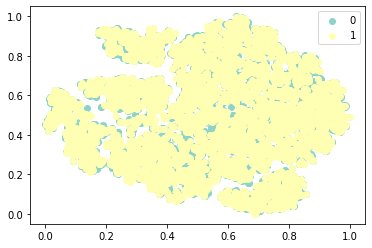

In [83]:
tx = X_norm[:,0]
ty = X_norm[:,1]

# Data Visualization
# Use matplotlib to plot the distribution
# The shape of X_norm is (N,2)

# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)

# for every class, we'll add a scatter plot separately
for label in range(2):
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(labels) if l == label]
    print(len(indices))
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)

    # convert the class color to matplotlib format
    color = plt.cm.Set3(label)

    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, color=color, label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')

# finally, show the plot
plt.show()

# Training Statistics

- Number of parameters:
  - Feature Extractor: 2, 142, 336
  - Label Predictor: 530, 442
  - Domain Classifier: 1, 055, 233

- Simple
 - Training time on colab: ~ 1 hr
- Medium
 - Training time on colab: 2 ~ 4 hr
- Strong
 - Training time on colab: 5 ~ 6 hrs
- Boss
 - **Unmeasurable**

# Learning Curve (Strong Baseline)
* This method is slightly different from colab.

![Loss Curve](https://i.imgur.com/vIujQyo.png)

# Accuracy Curve (Strong Baseline)
* Note that you cannot access testing accuracy. But this plot tells you that even though the model overfits the training data, the testing accuracy is still improving, and that's why you need to train more epochs.

![Acc Curve](https://i.imgur.com/4W1otXG.png)



# Q&A

If there is any problem related to Domain Adaptation, please email to b08901058@ntu.edu.tw / mlta-2022-spring@googlegroups.com。

